### Librerias utilizadas

In [107]:
#librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import epsilon_0

### Punto #1 : Regula Falsi

In [108]:
#Funcion Regula Falsi

def regula_falsi(f, a, b, maxiter=1000, tol=1e-18):
    '''
    Utiliza el método de Regula Falsi para encontrar una raíz de la 
    función f en el intervalo [a, b].
    Entrada:
        f: función de la cual se quiere encontrar una raíz.
        a: float. Extremo izquierdo del intervalo inicial.
        b: float. Extremo derecho del intervalo inicial.
        maxiter: int, opcional. Máximo de iteraciones permitidas.
                Por defecto = 1000
        tol: float, opcional. Criterio de convergencia para la raíz.
                Por defecto = 1e-18
    Salida:
        c: float. Aproximación de la raíz de la función.
    '''

    if f(a)*f(b)>0: 
        #Nos aseguramos que f(a) y f(b) tengan signos opuestos para encontrar una raíz
        raise ValueError('f(a) y f(b) deben tener signos opuestos.')
    
    for i in range(maxiter):
        fa, fb = f(a), f(b) #Evaluamos a y b en la función
        num = (a * fb) - (b * fa)
        den = fb - fa
        c = num / den #Se calcula c y se vealua f(c)
        fc = f(c)

        if abs(fc) < tol: 
            #Si f(c) es menor a la tolerancia establecida se encontro la raiz
            return c
        
        if fc * fa > 0:
            #Si f(c) tiene el mismo signo que f(a), se actualiza a=c
            a = c

        else: 
            #De lo contrario, b=c
            b = c

f = lambda x: x**2 - 4

print('<<< Vamos a utilizar el método Regula Falsi para hallar la raíz de una función >>>\n', '\nLa funcion utilizada fue: x^2 -4\n')

raiz = regula_falsi(f,0,3)
print(f"La raíz aproximada es: {raiz}")

<<< Vamos a utilizar el método Regula Falsi para hallar la raíz de una función >>>
 
La funcion utilizada fue: x^2 -4

La raíz aproximada es: 2.0


### Punto #2 : 

In [109]:
#Funcion para hallar la fuerza ejercida sobre la carga por el anillo

def f_q(a, x):
    '''
    Calcula la fuerza electrostática sobre una carga q 
    debida a otra carga Q en un conductor en forma de anillo.
    Entrada:
        a: float. Radio del conductor en forma de anillo.
        x: float. Distancia horizontal de la particula que 
                pasa por el centro del anillo.
    Salida:
        F: float. Fuerza ejercida sobre la carga por el anillo
    '''
    Q = q = 2e-5 # Supone cargas iguales
    den = 4 * np.pi * epsilon_0 * (x**2 + a**2)**(3/2)
    return q * Q * x / den

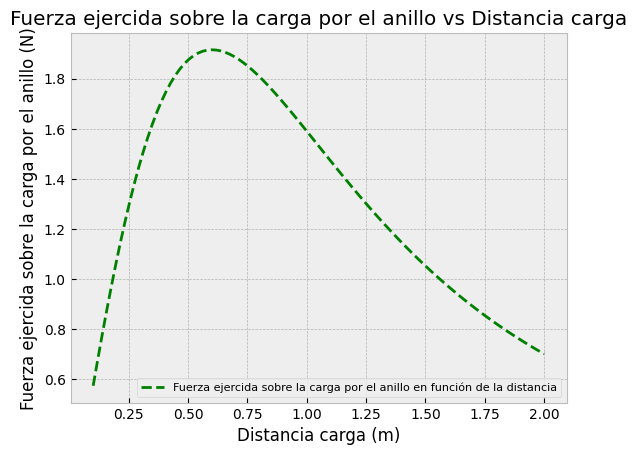

In [110]:
#Haga un gráfico de F(x) para un anillo de radio a=0.85m para 0.1 ≤ x ≤2.0m

a = 0.85 #Radio del anillo
x = np.linspace(0.1, 2, 100) # generamos un linspace para realizar el gráfico

plt.style.use('bmh')
plt.plot(x, f_q(a, x), 'g--', label='Fuerza ejercida sobre la carga por el anillo en función de la distancia')
plt.xlabel('Distancia carga (m)')
plt.ylabel('Fuerza ejercida sobre la carga por el anillo (N)')
plt.title('Fuerza ejercida sobre la carga por el anillo vs Distancia carga')
plt.legend(fontsize=8)


Vamos a encontrar el valor de x en el cual la fuerza será equivalente a 1.25N

Valor de x tal que F(x) = 1.25N con el metodo de Newton-Raphson: x = 1.2973739416888912 m
Valor de x tal que F(x) = 1.25N con el metodo de Regula Falsi: x = 1.2973739416891326 m

Confirmación gráfica


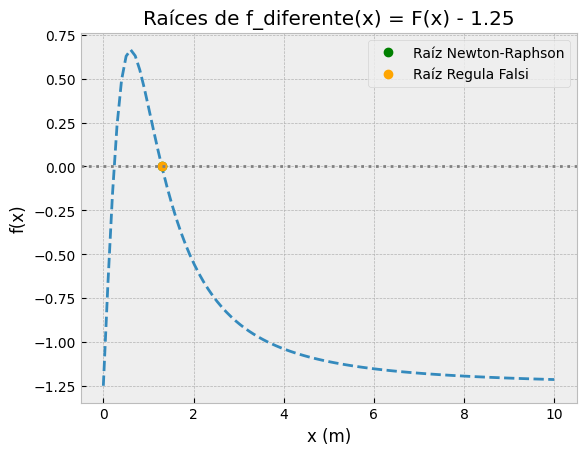

In [111]:
#Uso del método de Newton-Raphson y otro diferente, para encontrar el valor de x en el cual la fuerza será equivalente a 1.25 N.

def f_diferente(a, x):
    '''
    Devuelve la diferencia entre la fuerza electrostática calculada 
    y el valor deseado (1.25 N) para un valor dado de 'a' y 'x'.
    Entrada:
        a: float. Radio del anillo.
        x: float. Distancia de la carga al centro del anillo.
    Salida:
        float: Diferencia F(x) - 1.25
    '''
    return f_q(a,x)- 1.25

def df_fd(a, x):
    '''
    Derivada de la función f_diferente respecto a x.
    Entrada:
        x: float. Distancia al centro del anillo.
        a: float. Radio del anillo.
    Salida:
        float: Derivada de la función f_diferente respecto a x.
    '''
    Q = q = 2e-5
    k= (q*Q) / (4*np.pi*epsilon_0)
    num = 2*x**2-a**2
    den = (x**2 + a**2)**(5/2)
    return (-1) * k * num / den

def newton_raphson(func, dfunc, x0, a, tol=1e-12, maxiter=1000):
    '''
    Método de Newton-Raphson para encontrar raíces de una función.
    Entrada:
        func: función objetivo f(a, x).
        dfunc: derivada de la función respecto a x.
        x0: float. Estimación inicial de la raíz.
        a: float. Parámetro adicional que se pasa a func y dfunc. Radio del anillo.
        tol: float, opcional. Tolerancia para la convergencia.
            Por defecto = 1e-12
        maxiter: int, opcional. Número máximo de iteraciones.
                Por defecto = 1000
    Salida:
        float: Raiz de la función.
    '''
    x = x0
    for i in range(maxiter):

        fx = func(a, x) #Evaluamos la funcion
        dfx = dfunc(a, x) #Evaluamos la derivada de la función
        if dfx == 0: #Evitamos dividir por cero
            raise ValueError('Derivada nula.')
        x_new = x - fx / dfx #Calculamos el nuevo punto
        if abs(x_new - x) < tol: #Si es menor a la tolerancia encontramos la raiz
            return x_new
        x = x_new
    raise ValueError('No converge.')

def regula_falsi(f, a, b, maxiter=1000, tol=1e-12):
    '''
    Utiliza el método de Regula Falsi para encontrar una raíz de la 
    función f en el intervalo [a, b].
    Entrada:
        f: función de la cual se quiere encontrar una raíz.
        a: float. Extremo izquierdo del intervalo inicial.
        b: float. Extremo derecho del intervalo inicial.
        maxiter: int, opcional. Máximo de iteraciones permitidas.
                Por defecto = 1000
        tol: float, opcional. Criterio de convergencia para la raíz.
                Por defecto = 1e-12
    Salida:
        c: float. Aproximación de la raíz de la función.
    '''
    d = 0.85 #Radio del anillo 
    if f(d, a)*f(d, b)>0:
        #Nos aseguramos que f(a) y f(b) tengan signos opuestos para encontrar una raíz
        raise ValueError('f(a) y f(b) deben tener signos opuestos.')
    
    for i in range(maxiter):
        fa, fb = f(d, a), f(d, b) #Evaluamos a y b en la función
        num = (a * fb) - (b * fa)
        den = fb - fa
        c = num / den #Se calcula c y se vealua f(c)

        if abs(f(d, c)) < tol:
            #Si f(c) es menor a la tolerancia establecida se encontro la raiz
            return c
        
        if f(d, c) * fa > 0:
            #Si f(c) tiene el mismo signo que f(a), se actualiza a=c
            a = c

        else:
            #De lo contrario, b=c
            b = c

#===========================
# Hallamos x para F = 1.25N
#===========================

print('Vamos a encontrar el valor de x en el cual la fuerza será equivalente a 1.25N\n')

raiz = newton_raphson(f_diferente, df_fd, x0=1.0, a=0.85)
print(f'Valor de x tal que F(x) = 1.25N con el metodo de Newton-Raphson: x = {raiz} m')

raiz_regula= regula_falsi(f_diferente, 1.2, 4)
print(f'Valor de x tal que F(x) = 1.25N con el metodo de Regula Falsi: x = {raiz_regula} m')

print('\nConfirmación gráfica')

a=0.85
x = np.linspace(0, 10, 100)
plt.plot(x, f_diferente(a,x), linestyle='--')
plt.plot(raiz, 0, 'o', label='Raíz Newton-Raphson', color='green')
plt.plot(raiz_regula, 0, 'o', label='Raíz Regula Falsi', color='orange')
plt.axhline(0,0, linestyle=':', color='grey' )
plt.xlabel('x (m)')
plt.ylabel('f(x)')
plt.title('Raíces de f_diferente(x) = F(x) - 1.25')
plt.legend()

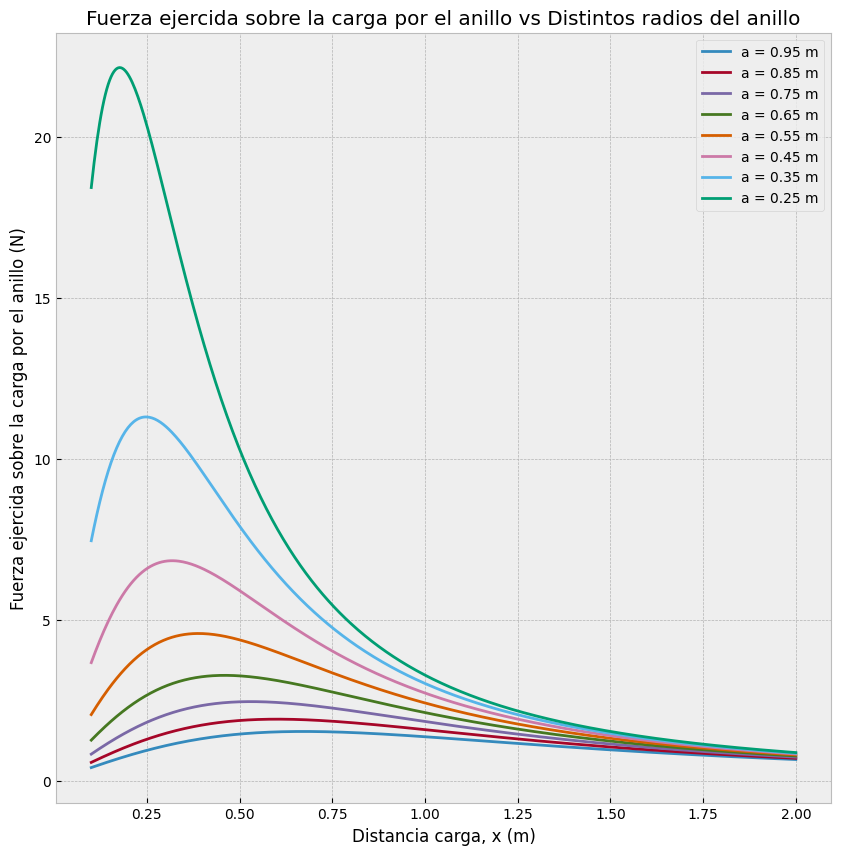

In [112]:
# Lista de valores que se van disminuyendo del radio del anillo 'a' en metros
a_vals = [0.95, 0.85, 0.75, 0.65, 0.55, 0.45, 0.35, 0.25]


# Rango de valores de posición 'x' donde se evaluará la fuerza
x_vals = np.linspace(0.1, 2.0, 500)

plt.style.use('bmh')
plt.figure(figsize=(10, 10))

for a in a_vals:
    plt.plot(x_vals, f_q(a, x_vals), label=f'a = {a} m')

plt.xlabel('Distancia carga, x (m)')
plt.ylabel('Fuerza ejercida sobre la carga por el anillo (N)')
plt.title('Fuerza ejercida sobre la carga por el anillo vs Distintos radios del anillo')
plt.legend()


Cuando disminuimos el valor del radio, la fuerza ejercida sobre la carga por el anillo aumenta

### Punto #3

Text(0.5, 1.0, 'Velocidad del cohete vs tiempo')

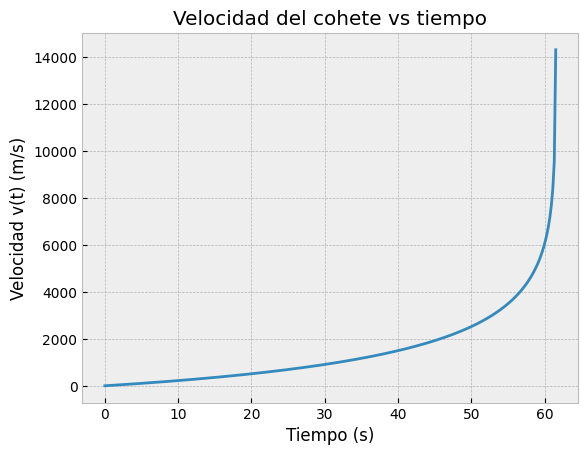

In [113]:
#La velocidad ascendente v de un cohete

def v_asc_cohete(u, m0, q, t):
    '''
    Calcula la velocidad ascendente de un cohete
    Entrada:
        u: float. Velocidad a la que se expulsa el cohete en m/s.
        m0: float. La masa inicial del cohete en kg.
        q: float. La razón de consumo del combustible kg/s.
        t: tiempo de subida.
    Salida:
        Velocidad ascendente de un cohete.
    '''
    g= 9.81 #Valor de la gravedad en la tierra
    h = m0 / (m0 -q*t)
    ln = np.log(h)
    return u*ln - g*t

#Definimos los valores dados
m0 = 1.6e5
u = 1800
q = 2600

#Grafico de v(t) para 0 ≤ t ≤ 100s.

t = np.linspace(0, 100,500)

y = v_asc_cohete(u, m0, q, t)

plt.plot(t, y)
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad v(t) (m/s)')
plt.title('Velocidad del cohete vs tiempo')

<<<<<<<<<<<<<<<<<<Vamos a encontrar el valor del tiempo en el cual la velocidad>>>>>>>>>>>>>>>>>>
                        ascendente de un cohete será equivalente a 750 m/s 

Valor del tiempo tal que v = 750 m/s con el metodo de Newton-Raphson: t = 26.407847955967043 m

Valor del tiempo tal que v = 750 m/s con el metodo de Regula Falsi: t = 26.407847955967032 m

Valor del tiempo tal que v = 750 m/s con el metodo de Bisección: t = 26.407847106456757 m


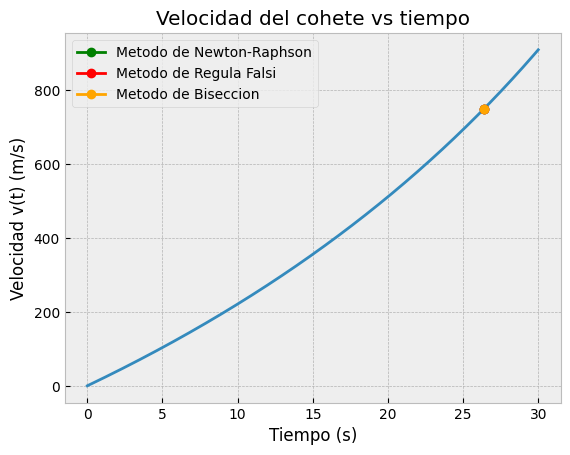

In [114]:
#El valor de tiempo para el cual v=750m/s usando el método de Newton-Raphson, Bisección y el de Regula-Falsi

#Utilizamos los datos ya dados
m0 = 1.6e5
u = 1800
q = 2600

def v_especificada(u, m0, q, t):
    '''
    Devuelve la diferencia entre la velocidad ascendente de un cohete calculada 
    y el valor deseado (750 m/s) para un valor dado de 'u', 'm0', 'q', 't'.
    Entrada:
        u: float. Velocidad a la que se expulsa el cohete en m/s.
        m0: float. La masa inicial del cohete en kg.
        q: float. La razón de consumo del combustible kg/s.
        t: tiempo de subida.
    Salida:
        float: Diferencia v_asc_cohete - 750
    '''
    return v_asc_cohete(u, m0, q, t) - 750

def dv_esp(u, m0, q, t):
    '''
    Derivada de la función v_asc_cohete respecto a t.
    Entrada:
        u: float. Velocidad a la que se expulsa el cohete en m/s.
        m0: float. La masa inicial del cohete en kg.
        q: float. La razón de consumo del combustible kg/s.
        t: tiempo de subida.
    Salida:
        float: Derivada de la función v_asc_cohete respecto a t.
    '''
    g = 9.81 #Valor de la gravedad en la tierra
    return (q*u)/(m0-q*t) - g

def newton_raphson(func, dfunc, x0, u, m0, q, tol=1e-12, maxiter=1000):
    '''
    Método de Newton-Raphson para encontrar raíces de una función.
    Entrada:
        func: función objetivo f(a, x).
        dfunc: derivada de la función respecto a x.
        x0: float. Estimación inicial de la raíz.
        u: float. Velocidad a la que se expulsa el cohete en m/s.
        m0: float. La masa inicial del cohete en kg.
        q: float. La razón de consumo del combustible kg/s.
        tol: float, opcional. Tolerancia para la convergencia.
            Por defecto = 1e-12
        maxiter: int, opcional. Número máximo de iteraciones.
                Por defecto = 1000
    Salida:
        float: Raiz de la función.
    '''
    t = x0
    for _ in range(maxiter):
        fx = func(u, m0, q, t)
        dfx = dfunc(u, m0, q, t)
        if dfx == 0:
            raise ValueError('Derivada nula.')
        x_new = t - fx / dfx
        if abs(x_new - t) < tol:
            return x_new
        t = x_new
    raise ValueError('No converge.')

def regula_falsi(f, u, m0, q, a, b, maxiter=1000, tol=1e-12):
    if f(u, m0, q, a)*f(u, m0, q, b)>0:
        raise ValueError('f(a) y f(b) deben tener signos opuestos.')
    
    for i in range(maxiter):
        fa, fb = f(u, m0, q, a), f(u, m0, q, b)
        num = (a * fb) - (b * fa)
        den = fb - fa
        c = num / den
        fc = f(u, m0, q, c)
        if abs(fc) < tol:
            return c
        
        if fc * fa > 0:
            a = c

        else:
            b = c

def biseccion(f, u, m0, q, a, b, tol=1e-6, max_iter=100):
    if f(u, m0, q, a) * f(u, m0, q, b) >= 0:
        raise ValueError("La función no cambia de signo en el intervalo [a, b].")
    
    iter_count = 0
    while (b - a) / 2 > tol and iter_count < max_iter:
        c = (a + b) / 2
        if f(u, m0, q, c) == 0:
            return c
        elif f(u, m0, q, a) * f(u, m0, q, c) < 0:
            b = c
        else:
            a = c
        iter_count += 1
    
    return (a + b) / 2

#============================
# Hallamos t para v = 750 m/s
#============================

print( '<<<<<<<<<<<<<<<<<<Vamos a encontrar el valor del tiempo en el cual la velocidad>>>>>>>>>>>>>>>>>>\n',
    '                       ascendente de un cohete será equivalente a 750 m/s \n')

newton = newton_raphson(v_especificada, dv_esp, 0, u, m0, q)
regulafalsi = regula_falsi(v_especificada, u, m0, q, 0, 30)
bisec = biseccion(v_especificada, u, m0, q, 0, 30)

print(f'Valor del tiempo tal que v = 750 m/s con el metodo de Newton-Raphson: t = {newton} m\n')
print(f'Valor del tiempo tal que v = 750 m/s con el metodo de Regula Falsi: t = {regulafalsi} m\n')
print(f'Valor del tiempo tal que v = 750 m/s con el metodo de Bisección: t = {bisec} m')

#Definimos los valores dados
m0 = 1.6e5
u = 1800
q = 2600

#Grafico de v(t) para 0 ≤ t ≤ 100s.

t = np.linspace(0, 30,500)

y = v_asc_cohete(u, m0, q, t)

plt.plot(t, y)
plt.plot(newton, 750, marker='o', linestyle='-', color='green', label='Metodo de Newton-Raphson')
plt.plot(regulafalsi, 750, marker='o', linestyle='-', color='red', label='Metodo de Regula Falsi')
plt.plot(bisec, 750, marker='o', linestyle='-', color='orange', label='Metodo de Biseccion')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad v(t) (m/s)')
plt.title('Velocidad del cohete vs tiempo')
plt.legend()

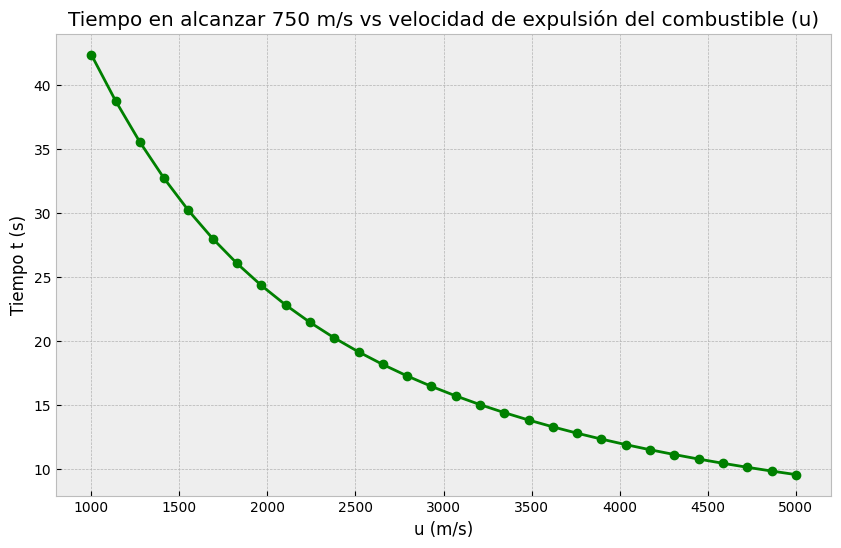

In [115]:
#Tiempo para el cual el cohete alcanza una velocidad de 750 m/s variando la velocidad a la que se expulsa el combustible

#Utilizamos los datos ya dados
m0 = 1.6e5
q = 2600
tlimite= m0/q - 1e-3

# Generación de 20 valores de u desde 1000 m/s hasta 3000 m/s
valores_u = np.linspace(1000, 5000, 30)
tiempos = []

for u in valores_u:
    sol = biseccion(v_especificada, u, m0, q, 0.1, tlimite)
    tiempos.append(sol)

plt.figure(figsize=(10, 6))
plt.plot(valores_u, tiempos, marker='o', linestyle='-', color='green')
plt.title("Tiempo en alcanzar 750 m/s vs velocidad de expulsión del combustible (u)")
plt.xlabel("u (m/s)")
plt.ylabel("Tiempo t (s)")
plt.grid(True)


Conclusiones:

Entre mayor sea la velocidad de salida del combustible, más rapido alcanzara la velocidad deseada.

La relacion entre u y t no es lineal, a su vez, cada vez que se aumenta u esta hace un menor aporte a t.

Para u bajos el tiempo puede llegar a durar 40 s y para u altos el tiempo puede llegar a durar menos de 10 s.

Como la funcion es decreciente y por su forma, podemos decir que conforme mas se aumente los valores de u menos tiempo necesitara para alcanzar esa velocidad, llegando a valores muy pequeños de t.